# Quantum Teleportation

# Quantum Teleportation Protocol  

Quantum teleportation is a foundational quantum protocol that allows the precise transfer of an unknown quantum state from a sender (Alice) to a receiver (Bob). The resources required for this protocol are:

1. **Quantum Entanglement**: A shared entangled state between Alice and Bob.  
2. **Classical Communication**: A classical channel to transmit measurement results.

## Overview of the Protocol  

To perform quantum teleportation, Alice and Bob must first establish a shared two-qubit entangled state. For this purpose, I will use the maximally entangled Bell state
$$
|\Phi^+⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩).
$$

Once the entangled state is generated, Alice can transmit a generic quantum state

$$
|\psi⟩ = \alpha|0⟩ + \beta|1⟩ \quad \text{where } |\alpha|^2 + |\beta|^2 = 1,
$$

accurately to Bob, even though she does not directly send the qubit carrying $|\psi⟩$.

This remarkable process leverages the principles of quantum mechanics, allowing information encoded in $|\psi⟩$ to be reconstructed on Bob's side without the need for the quantum state to travel through the classical channel.


## Step 1: Constructing the Initial State for Teleportation  

To begin the process of teleporting the state $|\psi⟩$ to Bob, Alice must prepare a composite system that is the tensor product of the generic state $|\psi⟩$ and the shared entangled state $|\Phi^+⟩$. The preparation of the state is as follows:

$$
|\psi_0⟩ = |\psi⟩_A |\Phi^+⟩_{AB}
$$

Expanding the entangled state $|\Phi^+⟩ $:

$$
|\psi_0⟩ = |\psi⟩_A \Bigg(\frac{|0⟩_A |0⟩_B + |1⟩_A |1⟩_B}{\sqrt{2}} \Bigg)
$$

Substituting $|\psi⟩ = \alpha|0⟩ + \beta|1⟩ $, we get:

$$
|\psi_0⟩ = \Big(\alpha |0⟩ + \beta |1⟩ \Big)_A \Bigg(\frac{|0⟩_A |0⟩_B + |1⟩_A |1⟩_B}{\sqrt{2}} \Bigg)
$$

Expanding the terms:

$$
|\psi_0⟩ = \frac{1}{\sqrt{2}} \Bigg[
\alpha |0⟩_A \Big(|0⟩_A |0⟩_B + |1⟩_A |1⟩_B\Big)
+ \beta |1⟩_A \Big(|0⟩_A |0⟩_B + |1⟩_A |1⟩_B\Big)
\Bigg]
$$

This prepared state $|\psi_0⟩ $ is the starting point for the teleportation process, containing both the generic state $|\psi⟩ $ and the shared entanglement between Alice and Bob.


## Step 2: Applying CNOT and Hadamard Gates  

After preparing the initial state $ |\psi_0\rangle $, Alice applies a CNOT gate and then a Hadamard gate to her qubits to make the state ready for the final measurement. The operations are as follows:

$$
|\psi_1 \rangle = (H \otimes \mathbb{I} \otimes \mathbb{I}) \, \text{CNOT}(1, 2) |\psi_0 \rangle
$$

Expanding $ |\psi_0\rangle $:

$$
|\psi_1 \rangle = (H \otimes \mathbb{I} \otimes \mathbb{I}) \Bigg[
\alpha |0\rangle_A \Bigg(\frac{|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B}{\sqrt{2}} \Bigg)
+ \beta |1\rangle_A \Bigg(\frac{|1\rangle_A |0\rangle_B + |0\rangle_A |1\rangle_B}{\sqrt{2}} \Bigg)
\Bigg]
$$

Applying the Hadamard gate to Alice's qubit:

$$
|\psi_1 \rangle =
\alpha \Bigg(\frac{|0\rangle_A + |1\rangle_A}{\sqrt{2}} \Bigg)
\Bigg(\frac{|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B}{\sqrt{2}} \Bigg)
+ \beta \Bigg(\frac{|0\rangle_A - |1\rangle_A}{\sqrt{2}} \Bigg)
\Bigg(\frac{|1\rangle_A |0\rangle_B + |0\rangle_A |1\rangle_B}{\sqrt{2}} \Bigg)
$$

Expanding the terms:

$$
|\psi_1 \rangle = \frac{1}{2} \Bigg[
\alpha |0\rangle_A |0\rangle_A |0\rangle_B + \alpha |0\rangle_A |1\rangle_A |1\rangle_B
+ \alpha |1\rangle_A |0\rangle_A |0\rangle_B + \alpha |1\rangle_A |1\rangle_A |1\rangle_B +
$$
$$
\beta |0\rangle_A |0\rangle_A |0\rangle_B - \beta |0\rangle_A |1\rangle_A |1\rangle_B
- \beta |1\rangle_A |0\rangle_A |0\rangle_B + \beta |1\rangle_A |1\rangle_A |1\rangle_B
\Bigg]
$$

This state $ |\psi_1 \rangle $ is now prepared for Alice's measurement in the subsequent step of the protocol.


## Measurment

The Alice's measurement can have four possible states $'00'$, $'01'$, $'10'$, and $'11'$, the following table represent the details of measurement and Bob state

| Alice's Result | **Bob's State          **        | **Bob Manipulation** |
|--------------------|--------------------------------|-------------------------|
**00**| $α|0⟩ + β|1⟩$  | \mathbb{I}  |
**01**| $α|1⟩ + β|0⟩$  | $X$         |
**10**| $α|0⟩ - β|1⟩$  | $Z$         |
**11**| $α|1⟩ - β|0⟩$  | $ZX$        |


# Qiskit Code

## Installing the qiskit libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, transpile, QuantumCircuit
from qiskit_aer import QasmSimulator, StatevectorSimulator
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import *
from qiskit.visualization import plot_bloch_multivector

## Function for Plotting the qiskit Circuit

In [2]:
def qplot(x):
  ''''
  x: is a quantum circuit
  '''
  return x.draw('mpl', fold=False, initial_state=True, scale=0.7, cregbundle = False)

In [9]:
# Amplitude α and Β to build quantum state |ψ⟩
theta = np.pi/7

alpha = np.sin(theta)
beta = np.cos(theta)
ampl = [alpha, beta]

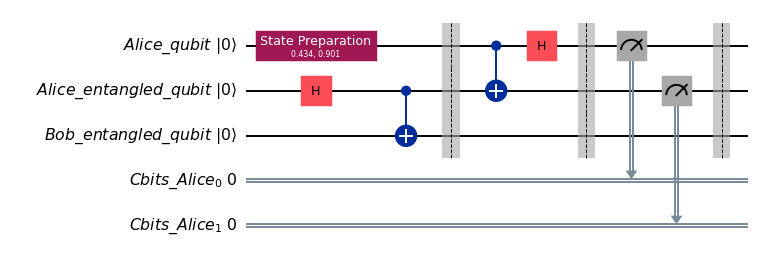

In [10]:
qa1 = QuantumRegister(1, name = 'Alice_qubit') # belong to Alice
qa2 = QuantumRegister(1, name = 'Alice_entangled_qubit') # belong to Alice
qb = QuantumRegister(1, name="Bob_entangled_qubit") # belong to Bob
ca = ClassicalRegister(2, name = 'Cbits_Alice') # Alice's classical bits

# build the quantum circuit
circuit = QuantumCircuit(qa1, qa2, qb, ca)
# Alice tensor product the unknow state for her into the cirucuit.
circuit.prepare_state(ampl, qa1)
# Creating the Entanglement between Alice and Bob
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()



# Alice manipulation before measurement
circuit.cx(qa1,qa2)
circuit.h(qa1)
circuit.barrier()
# measurement
circuit.measure([0,1],ca)
circuit.barrier()


qplot(circuit)

In [12]:
backend2 = StatevectorSimulator()

<ipython-input-13-e2a94a8651fc>:1: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circuit.z(2).c_if(ca[0],1)
<ipython-input-13-e2a94a8651fc>:2: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circuit.x(2).c_if(ca[1],1)


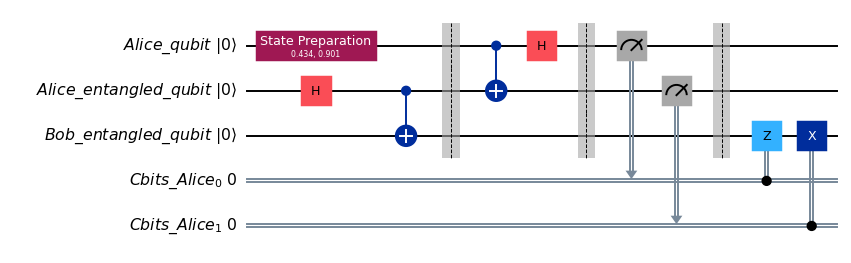

In [13]:
circuit.z(2).c_if(ca[0],1)
circuit.x(2).c_if(ca[1],1)

qplot(circuit)

In [27]:
transpiled_circ = transpile(circuit.reverse_bits(), backend2)
job = backend2.run(transpiled_circ)
result = job.result()
sv = result.get_statevector()

In [28]:
# Attention: two first qubits belong to Alice and the last qubit belong to Bob.
sv.draw('latex')

<IPython.core.display.Latex object>

## Visulaization of Final State

The Bob's State (Third Bloch Sphere) 



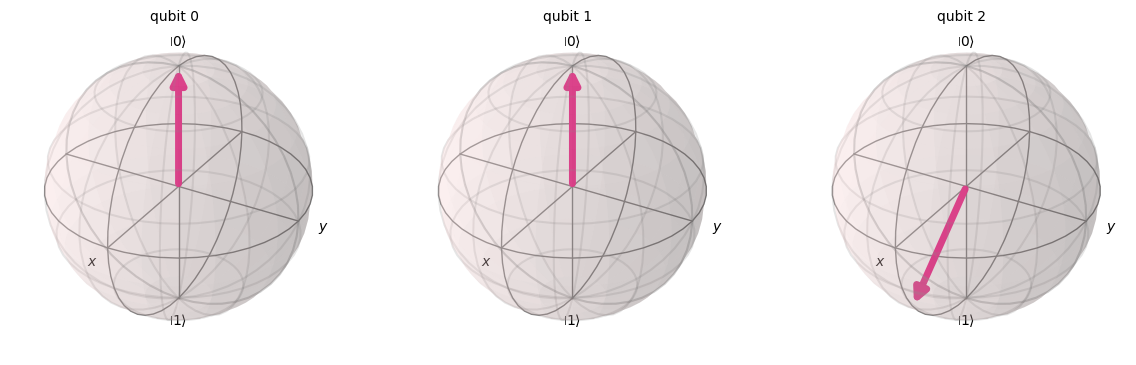

In [22]:
print("The Bob's State (Third Bloch Sphere) \n")
plot_bloch_multivector(sv)

## Visualization of Input State

The Alice's Prepared State 



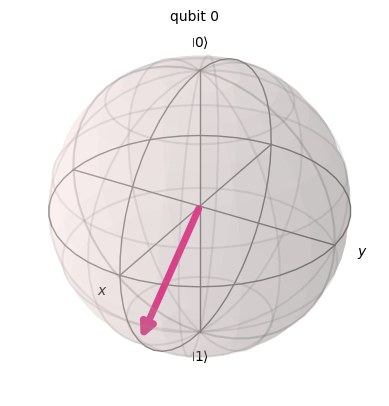

<IPython.core.display.Latex object>

In [26]:
initial_state = QuantumCircuit(1)
initial_state.prepare_state(ampl, 0)

print("The Alice's Prepared State \n")
display(plot_bloch_multivector(Statevector(initial_state)), Statevector(initial_state).draw('latex') )

Thus we can see, with this protocol Alice exactly sent an uknown state $|\psi⟩$ to Bob!